In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Passa arquivos de uma pasta do drive pra outra, usada pra passar as imagens de um banco de dados pra outra pasta

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving OrigaList.csv to OrigaList.csv


In [ ]:
import os
from PIL import Image

directory = "/content/drive/MyDrive/compara_segmentadores/data2/A/DRIVEpng/tudo/anotacoes/"

for filename in os.listdir(directory):
    if filename.endswith(".jpg"):
        filepath = os.path.join(directory, filename)
        new_filepath = os.path.join(directory, os.path.splitext(filename)[0] + ".png")

        img = Image.open(filepath)
        img = img.convert("RGB")
        img.save(new_filepath, "PNG")

        os.remove(filepath)

print("Conversion completed.")


Conversion completed.


In [ ]:
import csv
import shutil, sys                                                                                                                                                    

out=open("OrigaList.csv","r")
data=csv.reader(out)
#data=[row for row in data]
data=[[row[0], (row[1]), (row[2]), (row[3]),(row[4])] for row in data] 
c=0
class1 = []
for row in data:
      #print(row)
      if row[4] == '1':
        #print("oh NOOOO")
        aa = row[1]
        class1.append(aa)
        #print(class1)
        ee = "/content/drive/My Drive/compara_segmentadores/data2/A/ORIGA/Masks/"+aa
        print(ee)
        shutil.move( ee, "/content/drive/My Drive/compara_segmentadores/data2/A/ORIGA/classe 1")
      elif row[4] == '0':
        #print("oh Siiiii")
        bb = row[1]
        class1.append(bb)
        #print(class1)
       
        gg = "/content/drive/My Drive/compara_segmentadores/data2/A/ORIGA/Masks/"+bb
        print(gg)
        shutil.move(gg ,"/content/drive/My Drive/compara_segmentadores/data2/A/ORIGA/classe 0") 

   
out.close()
print (data)
new_data=[[row[0], (row[1]), (row[2]), (row[3]),(row[4])]  for row in data]
#print (new_data)
out=open("new_data.csv","w")
output=csv.writer(out)
for row in new_data:
    output.writerow(row)
out.close()

/content/drive/My Drive/compara_segmentadores/data2/A/ORIGA/Masks/001.jpg


Error: ignored

In [ ]:
import os 
print(os.listdir(("/content/drive/My Drive/compara_segmentadores/data2/A/ORIGA/Masks")))

[]


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import keras.utils as image
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import keras.utils as image
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


#import os
#for dirname, _, filenames in os.walk('/kaggle/input/glaucoma-datasets'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))
        



# Initialising the CNN
classifier = Sequential()
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (256,256, 3), activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Callbacks
checkpoint = ModelCheckpoint("f1.h5", monitor='accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq='epoch')
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.1, patience=2, verbose=0, mode='auto', cooldown=0, min_lr=0)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)
# print(train_datagen)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/compara_segmentadores/data2/A/ORIGA/train/',
target_size = (256,256),
batch_size = 32,
class_mode = 'binary')
# print(test_datagen)
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/compara_segmentadores/data2/A/ORIGA/test/',
target_size = (256,256),
batch_size = 32,
class_mode = 'binary')

val_datagen = ImageDataGenerator(rescale = 1./255)
val_set = val_datagen.flow_from_directory('/content/drive/My Drive/compara_segmentadores/data2/A/ORIGA/valid/',
target_size = (256, 256),
batch_size = 32,
class_mode = 'binary')

history = classifier.fit(training_set,  
                         epochs = 10,
                         validation_data = val_set,
                         callbacks=[checkpoint, reduce_lr])

Found 587 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Found 23 images belonging to 2 classes.
Epoch 1/10
19/19 [==============================] - ETA: 0s - loss: 1.1080 - accuracy: 0.6848
Epoch 1: accuracy did not improve from 0.75615
19/19 [==============================] - 129s 7s/step - loss: 1.1080 - accuracy: 0.6848 - val_loss: 0.7493 - val_accuracy: 0.4783 - lr: 0.0010
Epoch 2/10
19/19 [==============================] - ETA: 0s - loss: 0.5581 - accuracy: 0.7615
Epoch 2: accuracy improved from 0.75615 to 0.76150, saving model to f1.h5
19/19 [==============================] - 122s 6s/step - loss: 0.5581 - accuracy: 0.7615 - val_loss: 0.9879 - val_accuracy: 0.4783 - lr: 0.0010
Epoch 3/10
19/19 [==============================] - ETA: 0s - loss: 0.5662 - accuracy: 0.7615
Epoch 3: accuracy did not improve from 0.76150
19/19 [==============================] - 122s 6s/step - loss: 0.5662 - accuracy: 0.7615 - val_loss: 1.0959 - val_accuracy: 0.4783 - lr: 0.0010


In [ ]:

!apt-get install python3.6



In [ ]:
!pip install tensorflow==2.8.0


In [ ]:
!pip install --upgrade tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

# Definir o tamanho das imagens de entrada
img_size = (224, 224)

# Definir o tamanho do batch e número de épocas
batch_size = 10
epochs = 100

# Definir o número de passos por época para o conjunto de treinamento e validação
train_steps_per_epoch = 455 // batch_size
val_steps_per_epoch = 30 // batch_size

# Definir o número de filtros para cada camada convolucional
num_filters = [32, 64, 128]

# Definir a taxa de aprendizagem inicial
learning_rate = 0.1

# Criar geradores de imagens para treinamento e validação
train_datagen = ImageDataGenerator(
    rescale=1./255,      # normalizar os valores dos pixels
    rotation_range=20,   # girar aleatoriamente as imagens em até 20 graus
    width_shift_range=0.2,   # mover aleatoriamente as imagens horizontalmente
    height_shift_range=0.2,  # mover aleatoriamente as imagens verticalmente
    shear_range=0.2,     # aplicar cisalhamento nas imagens
    zoom_range=0.2,      # aplicar zoom nas imagens
    horizontal_flip=True,    # espelhar aleatoriamente as imagens horizontalmente
    validation_split=0.2   # definir a proporção de imagens para validação
)

# Criar gerador de imagens de treinamento
train_generator = train_datagen.flow_from_directory(
    '/content/drive/My Drive/compara_segmentadores/data2/A/ORIGA/train/',  # diretório com as imagens
    target_size=img_size,    # tamanho das imagens
    batch_size=batch_size,     # tamanho do lote
    class_mode='binary',       # modo de classificação (binário ou multiclasse)
    subset='training',         # usar apenas as imagens de treinamento
    shuffle=True               # embaralhar as imagens a cada época
)

# Criar gerador de imagens de validação
val_generator = train_datagen.flow_from_directory(
    '/content/drive/My Drive/compara_segmentadores/data2/A/ORIGA/valid/',  # diretório com as imagens
    target_size=img_size,    # tamanho das imagens
    batch_size=batch_size,     # tamanho do lote
    class_mode='binary',       # modo de classificação (binário ou multiclasse)
    subset='validation',       # usar apenas as imagens de validação
    shuffle=True               # embaralhar as imagens a cada época
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Carregar os conjuntos de treinamento e validação
train_set = train_datagen.flow_from_directory(
    directory='/content/drive/My Drive/compara_segmentadores/data2/A/ORIGA/train/',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)



val_set = val_datagen.flow_from_directory(
    directory='/content/drive/My Drive/compara_segmentadores/data2/A/ORIGA/valid/',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

# Definir o modelo da rede neural
model = tf.keras.models.Sequential([
    # Camada convolucional 1
    tf.keras.layers.Conv2D(num_filters[0], 3, activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    tf.keras.layers.MaxPooling2D(2),
    # Camada convolucional 2
    tf.keras.layers.Conv2D(num_filters[1], 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
    # Camada convolucional 3
    tf.keras.layers.Conv2D(num_filters[2], 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
    # Camada Flatten
    tf.keras.layers.Flatten(),
    # Camada Dense
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    # Camada de saída
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilar o modelo
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    metrics=['accuracy']
)

# Definir os callbacks
#checkpoint = ModelCheckpoint('path/to/model.h5',monitor = 'val_loss', save_weights_only = False, save_best_only=True, mode='max', verbose=1,save_freq=1)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-7, mode='min', verbose=1)

# Treinar o modelo
model_info = model.fit(
    train_set,
    epochs=epochs,
    validation_data=val_set,
    steps_per_epoch=train_steps_per_epoch,
    validation_steps=val_steps_per_epoch,
    callbacks=[checkpoint, reduce_lr]
)




Found 470 images belonging to 2 classes.
Found 4 images belonging to 2 classes.
Found 587 images belonging to 2 classes.
Found 23 images belonging to 2 classes.
Epoch 1/100
45/45 [==============================] - ETA: 0s - loss: 32919.1250 - accuracy: 0.7133
Epoch 1: accuracy improved from -inf to 0.71333, saving model to f1.h5
45/45 [==============================] - 140s 3s/step - loss: 32919.1250 - accuracy: 0.7133 - val_loss: 0.9355 - val_accuracy: 0.4783 - lr: 0.1000
Epoch 2/100
45/45 [==============================] - ETA: 0s - loss: 0.5912 - accuracy: 0.7422
Epoch 2: accuracy improved from 0.71333 to 0.74222, saving model to f1.h5
45/45 [==============================] - 108s 2s/step - loss: 0.5912 - accuracy: 0.7422 - val_loss: 0.8860 - val_accuracy: 0.4783 - lr: 0.1000
Epoch 3/100
45/45 [==============================] - ETA: 0s - loss: 0.5718 - accuracy: 0.7562
Epoch 3: accuracy improved from 0.74222 to 0.75615, saving model to f1.h5
45/45 [==============================] - 

KeyboardInterrupt: ignored

In [ ]:
# Performance evaluation
#########################
batch_size = 32
num_samples = len(test_set.filenames)
steps_per_epoch = int(num_samples / batch_size) + 1
score = classifier.evaluate_generator(test_set, steps=steps_per_epoch)
print("Number of samples: ", num_samples)
print("Loss: ", score[0])
print("Accuracy: ", score[1])


<ipython-input-8-630d70316d5e>:6: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = classifier.evaluate_generator(test_set, steps=steps_per_epoch)


Number of samples:  40
Loss:  0.7236219644546509
Accuracy:  0.4000000059604645


In [ ]:
classifier.save('/content/drive/My Drive/Colab_Project/glaucoma/model.h5')


In [ ]:
import os
from keras.models import load_model
from PIL import Image
from keras.preprocessing import image
import numpy as np
import cv2

In [ ]:
target_size = (256,256)
model=load_model('/content/drive/My Drive/Colab_Project/glaucoma/model.h5')
print("model loaded")


model loaded


In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = tf.keras.utils.load_img('/content/drive/My Drive/compara_segmentadores/data2/A/ORIGA/test/classe 0/007.jpg', target_size = (256,256))
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
print(result)
if result[0][0] == 1:
 print("Glaucoma")
else:
 print("Not Glaucoma")


1/1 [==============================] - 0s 162ms/step
[[1.]]
Glaucoma


In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = tf.keras.utils.load_img('/content/drive/My Drive/compara_segmentadores/data2/A/ORIGA/test/classe 1/050.jpg', target_size = (256,256))
test_image = tf.keras.utils.img_to_array(test_image)

test_image = np.expand_dims(test_image, axis = 0)
#print(test_image)
result = model.predict(test_image)
print(result)
training_set.class_indices
if result[0][0] == 1:
 print("Glaucoma")
else:
 print("Not Glaucoma")

1/1 [==============================] - 0s 46ms/step
[[1.]]
Glaucoma


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from PIL import  Image
%matplotlib inline
plt.style.use('fivethirtyeight')
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['binary_accuracy'])+1),model_history.history['acc'],metrics="binary_accuracy")
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()
     

KeyError: ignored

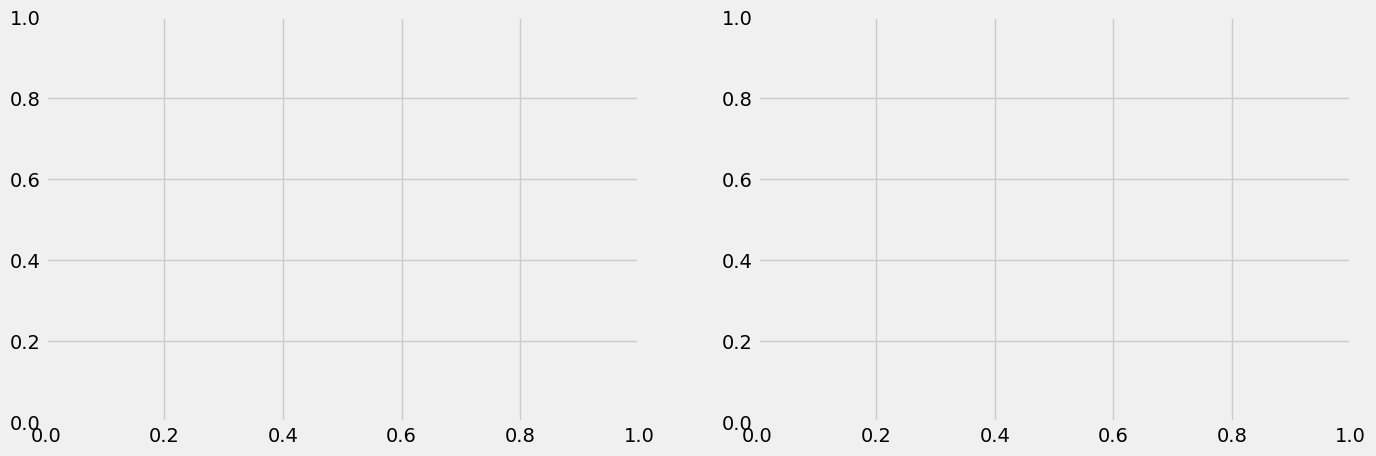

In [ ]:
plot_model_history(model_info) #Não funciona